# Window dressing
How do NFL teams change their pre-snap look to deceive opponents

In [62]:
import sys
import os
import polars as pl
import pandas as pd
import itables

current_dir = os.getcwd()
sys.path.append(os.path.join(current_dir, "../../", 'src'))

from config import Constants
from preprocessing.preprocessing import BigDataBowlData
from preprocessing.play_prediction import PlayPredictionModel
from plotting.plotting import PlotPlayVertical
import seaborn as sns

# init_notebook_mode(all_interactive=True)
pl.Config.set_tbl_cols(-1)
pl.Config.set_tbl_rows(100)


GAMES_FILE = "../../data/games.csv"
PLAYS_FILE = "../../data/plays.csv"
PLAYERS_FILE = "../../data/players.csv"
PLAYER_PLAYS_FILE = "../../data/player_play.csv"

TRACKING_FILES = ["../../data/tracking_week_1.csv",
                  "../../data/tracking_week_2.csv",
                    "../../data/tracking_week_3.csv",
                    "../../data/tracking_week_4.csv",
                    "../../data/tracking_week_5.csv",
                    "../../data/tracking_week_6.csv",
                    "../../data/tracking_week_7.csv",
                    "../../data/tracking_week_8.csv",
                    "../../data/tracking_week_9.csv",
                  ]

data = BigDataBowlData(GAMES_FILE, 
                       PLAYS_FILE, 
                       PLAYERS_FILE, 
                       PLAYER_PLAYS_FILE, 
                       TRACKING_FILES)

play_prediction = PlayPredictionModel(data)

In [63]:
model_features = []

play_dicts = data.plays_df.to_dicts()
for play_row in play_dicts:
    try:
        play_features = play_prediction.get_model_features(play_row["gameId"], play_row["playId"])
        model_features.append(play_features)
    except Exception as e:
        print(f"Error in play {play_row['gameId']} - {play_row['playId']}")
        print(f"Error: {e}")
        model_features.append(None)


Play 2022102302-1437 has no line set tracking data
Play 2022103005-121 has no ball snap tracking data
Play 2022092502-3024 has no line set tracking data
Play 2022110606-2006 has no ball snap tracking data
Play 2022091811-3377 has no line set tracking data
Play 2022100903-2016 has no line set tracking data
Play 2022100900-3273 has no ball snap tracking data
Play 2022103001-4479 has no line set tracking data
Play 2022103002-3333 has no line set tracking data
Play 2022100212-3804 has no line set tracking data
Play 2022102311-2901 has no line set tracking data
Play 2022100208-3365 has no ball snap tracking data
Play 2022091804-2685 has no ball snap tracking data
Play 2022102304-2362 has no ball snap tracking data
Play 2022100201-2252 has no line set tracking data
Play 2022101610-2955 has no ball snap tracking data
Play 2022103005-3379 has no line set tracking data
Play 2022091110-3449 has no line set tracking data
Play 2022102302-850 has no line set tracking data
Play 2022091811-2913 has n

In [64]:
parsed_model_features = [x for x in model_features if x is not None]

## Extract information on look shifts and correlation with EPA 

In [65]:
pre_snap_movement_df = pd.DataFrame([x["spatial_change_epa_state"] for x in parsed_model_features])

In [66]:
pre_snap_movement_df.head()

,gameId,playId,quarter,down,logYardsToGo,distanceToEndzone,scoreDifference,gameSecondsRemaining,possessionTeam,defensiveTeam,playHadPlayersInMotionAtSnap,playHadMotionAndCameSet,expectedPointsAdded,playType,offenseChange,defenseChange
0,2022102302,2655,3,1,2.302585,79,18,1014,CIN,ATL,False,False,0.702717,pass,1.990714,33.757605
1,2022091809,3698,4,1,2.302585,92,0,133,CIN,DAL,False,False,-0.240509,pass,1.996782,9.580006
2,2022103004,3146,4,3,2.484907,80,-14,120,HOU,TEN,False,True,-0.218480,pass,18.797339,17.127515
3,2022110610,348,1,2,2.302585,23,0,3268,KC,TEN,False,False,-0.427749,pass,1.044283,19.022130
4,2022102700,2799,3,2,2.079442,27,0,1036,BAL,TB,True,False,-0.638912,run,4.382846,12.331829


<Axes: xlabel='offenseChange', ylabel='defenseChange'>

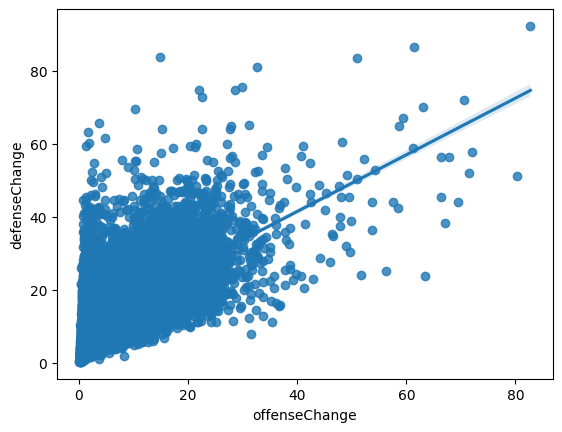

In [67]:
sns.regplot(data=pre_snap_movement_df, x="offenseChange", y="defenseChange")

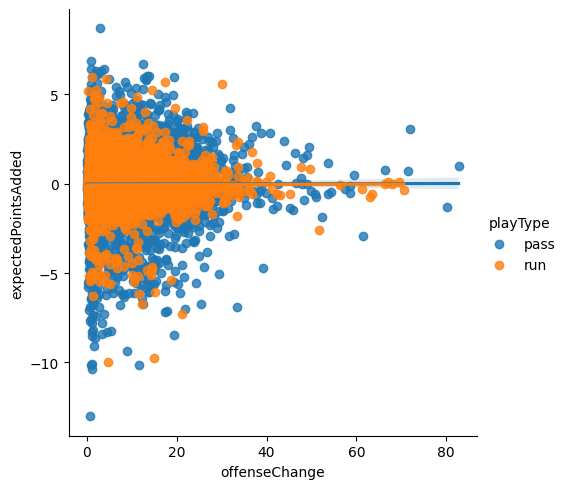

In [68]:
sns.lmplot(data=pre_snap_movement_df, x="offenseChange", y="expectedPointsAdded", hue="playType")

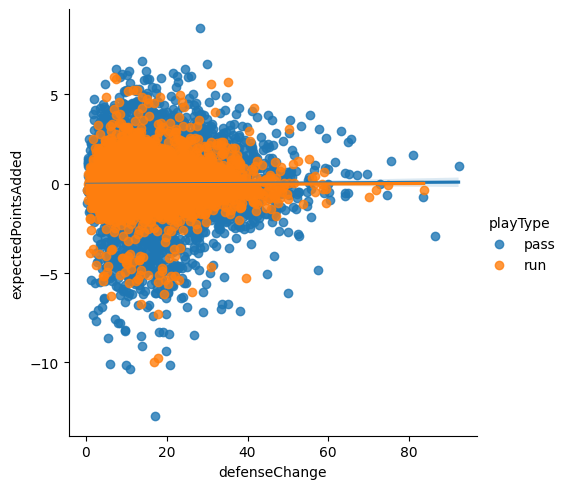

In [69]:
sns.lmplot(data=pre_snap_movement_df, x="defenseChange", y="expectedPointsAdded", hue="playType")

In [70]:
pre_snap_movement_df.sort_values("defenseChange", ascending=False)

,gameId,playId,quarter,down,logYardsToGo,distanceToEndzone,scoreDifference,gameSecondsRemaining,possessionTeam,defensiveTeam,playHadPlayersInMotionAtSnap,playHadMotionAndCameSet,expectedPointsAdded,playType,offenseChange,defenseChange
6876,2022091108,705,1,2,1.945910,90,7,2783,TEN,NYG,False,True,0.979440,pass,82.737317,92.258956
2908,2022091810,2435,3,2,2.772589,81,0,1727,DEN,HOU,False,True,-2.928220,pass,61.464809,86.542152
607,2022092508,1369,2,2,2.197225,16,10,2295,PHI,WAS,False,True,-0.365478,run,14.821968,83.623681
7830,2022092503,1133,2,2,2.197225,9,0,2568,BUF,MIA,False,False,-0.760246,pass,50.924247,83.473124
2586,2022092503,2306,3,3,1.945910,95,0,1638,BUF,MIA,False,False,1.627936,pass,32.718228,80.963770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1580,2022092510,1497,2,1,2.302585,47,-13,2187,ARI,LA,False,False,1.306449,pass,0.086569,0.378393
570,2022091103,3147,4,2,1.945910,63,6,423,PIT,CIN,False,False,-0.450886,pass,0.237902,0.375073
9128,2022091802,108,1,2,2.484907,77,0,3567,DET,WAS,False,False,-1.093644,pass,0.356747,0.336606
13593,2022103002,1099,2,1,2.302585,52,7,2562,DAL,CHI,False,False,-0.335911,run,0.280639,0.295648


## Play prediction model

In [71]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, confusion_matrix
import pandas as pd
import numpy as np

In [72]:
game_state_features = [x["game_state_features_with_target"] for x in parsed_model_features]
game_state_features_df = pd.DataFrame(game_state_features)

game_state_train_x = game_state_features_df[game_state_features_df["split"] == "train"].drop(columns=["gameId", "playId", "playType", "isPass", "split"])
game_state_train_y = game_state_features_df[game_state_features_df["split"] == "train"]["isPass"]

game_state_test_x = game_state_features_df[game_state_features_df["split"] == "test"].drop(columns=["gameId", "playId", "playType", "isPass", "split"])
game_state_test_y = game_state_features_df[game_state_features_df["split"] == "test"]["isPass"]

lgb_game_state_train = lgb.Dataset(data=game_state_train_x, label=game_state_train_y)
lgb_game_state_test = lgb.Dataset(data=game_state_test_x, label=game_state_test_y)

In [73]:
# Claude hyperparameter tuning parameters
# # Tuning
# from sklearn.model_selection import RandomizedSearchCV
# import lightgbm as lgb
# from scipy.stats import randint, uniform

# # Define the parameter grid
# param_grid = {
#     'learning_rate': uniform(0.01, 0.3),  # Will sample between 0.01 and 0.31
#     'n_estimators': randint(50, 300),     # Number of boosting rounds
#     'max_depth': randint(3, 12),          # Maximum tree depth
#     'num_leaves': randint(10, 100),       # Number of leaves in each tree
#     'min_child_samples': randint(5, 50),  # Minimum number of data needed in a leaf
#     'subsample': uniform(0.6, 0.4),       # Sampling ratio of training data
#     'colsample_bytree': uniform(0.6, 0.4),# Sampling ratio of columns for each tree
#     'reg_alpha': uniform(0, 2),           # L1 regularization
#     'reg_lambda': uniform(0, 2),          # L2 regularization
# }

# # Create the LightGBM classifier
# base_model = lgb.LGBMClassifier(
#     objective='binary',
#     metric='binary_logloss',
#     boosting_type='gbdt',
#     random_state=4411
# )

# # Set up RandomizedSearchCV
# # n_iter controls how many parameter combinations to try
# search = RandomizedSearchCV(
#     estimator=base_model,
#     param_distributions=param_grid,
#     n_iter=10,  # Number of parameter settings sampled
#     cv=5,       # 5-fold cross-validation
#     scoring='roc_auc',  # You can change this to other metrics like 'accuracy', 'f1', etc.
#     n_jobs=-1,  # Use all available cores
#     random_state=4411,
#     verbose=2
# )

# # Fit the model
# # Note: Pass regular numpy arrays or pandas DataFrames, not LightGBM datasets
# search.fit(
#     game_state_train_x,  # Your training features
#     game_state_train_y,  # Your training labels
#     eval_set=[(game_state_test_x, game_state_test_y)],
#     callbacks=[lgb.early_stopping(stopping_rounds=10)]
# )

# # Get the best parameters and score
# print("Best parameters found:", search.best_params_)
# print("Best cross-validation score:", search.best_score_)

# # Use the best model for predictions
# best_model = search.best_estimator_
# game_state_test_predictions = best_model.predict_proba(game_state_test_x)[:, 1]
# game_state_binary_predictions = [1 if p >= 0.5 else 0 for p in game_state_test_predictions]

# # Get accuracy and classification report
# print(f"Accuracy: {accuracy_score(game_state_test_y, game_state_binary_predictions)}")
# print("\nClassification Report:")
# print(classification_report(game_state_test_y, game_state_binary_predictions))

In [74]:
params = {
    'objective': 'binary',  # for binary classification
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'seed': 4411,
    'colsample_bytree': 0.8598722856399068, 
    'learning_rate': 0.2894774567880305, 
    'max_depth': 5, 
    'min_child_samples': 31, 
    'n_estimators': 211, 
    'num_leaves': 25, 
    'reg_alpha': 0.7829947387819356, 
    'reg_lambda': 1.1945847756567576, 
    'subsample': 0.9035520535570639
}

game_state_only_model = lgb.train(
    params,
    lgb_game_state_train,
    num_boost_round=100,
    valid_sets=[lgb_game_state_test],
    callbacks=[lgb.early_stopping(stopping_rounds=10)]
)

# Make predictions
game_state_test_predictions = game_state_only_model.predict(game_state_test_x)
game_state_binary_predictions = [1 if p >= 0.5 else 0 for p in game_state_test_predictions]  # Convert probabilities to binary predictions


[LightGBM] [Info] Number of positive: 6723, number of negative: 4300
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000059 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 456
[LightGBM] [Info] Number of data points in the train set: 11023, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.609907 -> initscore=0.446919
[LightGBM] [Info] Start training from score 0.446919
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [

/workspaces/big_data_bowl_2025/.venv/lib/python3.12/site-packages/lightgbm/engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


In [75]:
# Make predictions
game_state_test_predictions = game_state_only_model.predict(game_state_test_x)
game_state_binary_predictions = [1 if p >= 0.5 else 0 for p in game_state_test_predictions]  # Convert probabilities to binary predictions


In [76]:
print(f"Accuracy: {accuracy_score(game_state_test_y, game_state_binary_predictions)}")
print("\nClassification Report:")
print(classification_report(game_state_test_y, game_state_binary_predictions))

Accuracy: 0.697260834014718

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.61      0.62      1974
           1       0.74      0.76      0.75      2918

    accuracy                           0.70      4892
   macro avg       0.68      0.68      0.68      4892
weighted avg       0.70      0.70      0.70      4892



In [77]:
roc_auc_score(game_state_test_y, game_state_test_predictions)

np.float64(0.7743194947615784)

In [78]:
# Feature importance
feature_importance = pd.DataFrame({
    'feature': game_state_only_model.feature_name(),
    'importance': game_state_only_model.feature_importance()
}).sort_values('importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
                feature  importance
5  gameSecondsRemaining         150
4       scoreDifference         124
3     distanceToEndzone         120
2          logYardsToGo          69
1                  down          45
0               quarter          16


## Spatial features prediction model

In [79]:
ball_snap_spatial_features_with_target = [x["ball_snap_spatial_features_with_target"] for x in parsed_model_features]
line_set_spatial_features_with_target = [x["line_set_spatial_features_with_target"] for x in parsed_model_features]

ball_snap_spatial_features_df = pd.DataFrame(ball_snap_spatial_features_with_target)
line_set_spatial_features_df = pd.DataFrame(line_set_spatial_features_with_target)

spatial_ball_snap_train_x = ball_snap_spatial_features_df[ball_snap_spatial_features_df["split"] == "train"].drop(columns=["gameId", "playId", "playType", "isPass", "split"])
spatial_ball_snap_train_y = ball_snap_spatial_features_df[ball_snap_spatial_features_df["split"] == "train"]["isPass"]

spatial_ball_snap_test_x = ball_snap_spatial_features_df[ball_snap_spatial_features_df["split"] == "test"].drop(columns=["gameId", "playId", "playType", "isPass", "split"])
spatial_ball_snap_test_y = ball_snap_spatial_features_df[ball_snap_spatial_features_df["split"] == "test"]["isPass"]

spatial_line_set_test_x = line_set_spatial_features_df[line_set_spatial_features_df["split"] == "test"].drop(columns=["gameId", "playId", "playType", "isPass", "split"])
spatial_line_set_test_y = line_set_spatial_features_df[line_set_spatial_features_df["split"] == "test"]["isPass"]

lgb_spatial_ball_snap_train = lgb.Dataset(data=spatial_ball_snap_train_x, label=spatial_ball_snap_train_y)
lgb_spatial_ball_snap_test = lgb.Dataset(data=spatial_ball_snap_test_x, label=spatial_ball_snap_test_y)
lgb_spatial_line_set_test = lgb.Dataset(data=spatial_line_set_test_x, label=spatial_line_set_test_y)

In [80]:
ball_snap_spatial_features_df.head()

,gameId,playId,offense_x_centroid,offense_x_rel_centroid,offense_y_centroid,offense_depth,offense_width,offense_in_box,offense_left_side,offense_right_side,...,defense_width_right_cluster_centroid,defense_depth_back_cluster_count,defense_depth_middle_cluster_count,defense_depth_front_cluster_count,defense_width_left_cluster_count,defense_width_middle_cluster_count,defense_width_right_cluster_count,playType,isPass,split
0,2022102302,2655,29.161818,-1.418182,24.915455,5.61,36.83,6,4,7,...,41.060000,5,5,1,3,7,1,pass,1,test
1,2022091809,3698,16.298182,-1.001817,29.030909,4.72,37.05,7,7,4,...,45.370000,5,4,2,3,7,1,pass,1,train
2,2022103004,3146,27.956364,-1.853636,26.834545,4.39,24.61,9,3,8,...,42.790000,4,5,2,5,5,1,pass,1,test
3,2022110610,348,84.980909,-1.789091,29.314242,4.61,33.81,7,6,5,...,36.755333,4,6,1,3,3,5,pass,1,test
4,2022102700,2799,80.512727,-2.307272,27.108788,6.99,26.69,9,5,6,...,45.583333,6,4,1,5,5,1,run,0,test


In [81]:
line_set_spatial_features_df.head()

,gameId,playId,offense_x_centroid,offense_x_rel_centroid,offense_y_centroid,offense_depth,offense_width,offense_in_box,offense_left_side,offense_right_side,...,defense_width_right_cluster_centroid,defense_depth_back_cluster_count,defense_depth_middle_cluster_count,defense_depth_front_cluster_count,defense_width_left_cluster_count,defense_width_middle_cluster_count,defense_width_right_cluster_count,playType,isPass,split
0,2022102302,2655,29.161818,-1.418182,24.915455,5.61,36.83,6,4,7,...,41.060000,5,5,1,3,7,1,pass,1,test
1,2022091809,3698,16.298182,-1.001817,29.030909,4.72,37.05,7,7,4,...,45.370000,5,4,2,3,7,1,pass,1,train
2,2022103004,3146,27.956364,-1.853636,26.834545,4.39,24.61,9,3,8,...,42.790000,4,5,2,5,5,1,pass,1,test
3,2022110610,348,84.980909,-1.789091,29.314242,4.61,33.81,7,6,5,...,36.755333,4,6,1,3,3,5,pass,1,test
4,2022102700,2799,80.512727,-2.307272,27.108788,6.99,26.69,9,5,6,...,45.583333,6,4,1,5,5,1,run,0,test


In [24]:
# # Claude hyperparameter tuning code
# # Tuning
# from sklearn.model_selection import RandomizedSearchCV
# import lightgbm as lgb
# from scipy.stats import randint, uniform

# # Define the parameter grid
# param_grid = {
#     'learning_rate': uniform(0.01, 0.3),  # Will sample between 0.01 and 0.31
#     'n_estimators': randint(50, 300),     # Number of boosting rounds
#     'max_depth': randint(3, 12),          # Maximum tree depth
#     'num_leaves': randint(10, 100),       # Number of leaves in each tree
#     'min_child_samples': randint(5, 50),  # Minimum number of data needed in a leaf
#     'subsample': uniform(0.6, 0.4),       # Sampling ratio of training data
#     'colsample_bytree': uniform(0.6, 0.4),# Sampling ratio of columns for each tree
#     'reg_alpha': uniform(0, 2),           # L1 regularization
#     'reg_lambda': uniform(0, 2),          # L2 regularization
# }

# # Create the LightGBM classifier
# base_model = lgb.LGBMClassifier(
#     objective='binary',
#     metric='binary_logloss',
#     boosting_type='gbdt',
#     random_state=4411
# )

# # Set up RandomizedSearchCV
# # n_iter controls how many parameter combinations to try
# search = RandomizedSearchCV(
#     estimator=base_model,
#     param_distributions=param_grid,
#     n_iter=10,  # Number of parameter settings sampled
#     cv=5,       # 5-fold cross-validation
#     scoring='roc_auc',  # You can change this to other metrics like 'accuracy', 'f1', etc.
#     n_jobs=-1,  # Use all available cores
#     random_state=4411,
#     verbose=2
# )

# # Fit the model
# # Note: Pass regular numpy arrays or pandas DataFrames, not LightGBM datasets
# search.fit(
#     spatial_ball_snap_train_x,  # Your training features
#     spatial_ball_snap_train_y,  # Your training labels
#     eval_set=[(spatial_ball_snap_test_x, spatial_ball_snap_test_y)],
#     callbacks=[lgb.early_stopping(stopping_rounds=10)]
# )

# # Get the best parameters and score
# print("Best parameters found:", search.best_params_)
# print("Best cross-validation score:", search.best_score_)

# # Use the best model for predictions
# best_model = search.best_estimator_
# spatial_ball_snap_test_predictions = best_model.predict_proba(spatial_ball_snap_test_x)[:, 1]
# spatial_ball_snap_binary_predictions = [1 if p >= 0.5 else 0 for p in spatial_ball_snap_test_predictions]

# # Get accuracy and classification report
# print(f"Accuracy: {accuracy_score(spatial_ball_snap_test_y, spatial_ball_snap_binary_predictions)}")
# print("\nClassification Report:")
# print(classification_report(spatial_ball_snap_test_y, spatial_ball_snap_binary_predictions))

In [25]:
params = {
    'objective': 'binary',  # for binary classification
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'seed': 4411,
    'colsample_bytree': 0.7159222217873522, 
    'learning_rate': 0.22232750493876458, 
    'max_depth': 5, 
    'min_child_samples': 43, 
    'n_estimators': 231, 
    'num_leaves': 10, 
    'reg_alpha': 1.5889162280086777, 
    'reg_lambda': 0.7731763927442281, 
    'subsample': 0.9317323990782951
    }

spatial_features_at_snap_model = lgb.train(
    params,
    lgb_spatial_ball_snap_train,
    num_boost_round=100,
    valid_sets=[lgb_spatial_ball_snap_test],
    callbacks=[lgb.early_stopping(stopping_rounds=10)]
)

/workspaces/big_data_bowl_2025/.venv/lib/python3.12/site-packages/lightgbm/engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 6723, number of negative: 4300
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.052495 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7328
[LightGBM] [Info] Number of data points in the train set: 11023, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.609907 -> initscore=0.446919
[LightGBM] [Info] Start training from score 0.446919
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[29]	valid_0's binary_logloss: 0.525598


In [33]:
# Make predictions
spatial_ball_snap_test_predictions = spatial_features_at_snap_model.predict(spatial_ball_snap_test_x)
spatial_ball_snap_binary_predictions = [1 if p >= 0.5 else 0 for p in spatial_ball_snap_test_predictions]  # Convert probabilities to binary predictions

spatial_line_set_test_predictions = spatial_features_at_snap_model.predict(spatial_line_set_test_x)

print(f"Accuracy: {accuracy_score(spatial_ball_snap_test_y, spatial_ball_snap_binary_predictions)}")
print("\nClassification Report:")
print(classification_report(spatial_ball_snap_test_y, spatial_ball_snap_binary_predictions))

Accuracy: 0.7385527391659853

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.62      0.66      1974
           1       0.76      0.82      0.79      2918

    accuracy                           0.74      4892
   macro avg       0.73      0.72      0.72      4892
weighted avg       0.74      0.74      0.74      4892



In [34]:
roc_auc_score(spatial_ball_snap_test_y, spatial_ball_snap_test_predictions)

np.float64(0.8054473404428926)

In [35]:
# Feature importance
feature_importance = pd.DataFrame({
    'feature': spatial_features_at_snap_model.feature_name(),
    'importance': spatial_features_at_snap_model.feature_importance()
}).sort_values('importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
                                  feature  importance
3                           offense_depth          26
5                          offense_in_box          23
15    offense_width_left_cluster_centroid          17
4                           offense_width          13
14   offense_depth_front_cluster_centroid          13
25                 defense_x_rel_centroid          13
17   offense_width_right_cluster_centroid          11
1                  offense_x_rel_centroid          10
19     offense_depth_middle_cluster_count          10
24                     defense_x_centroid           9
11                    offense_hull_volume           8
37  defense_depth_middle_cluster_centroid           8
12    offense_depth_back_cluster_centroid           7
2                      offense_y_centroid           7
35                    defense_hull_volume           7
40  defense_width_middle_cluster_centroid           6
36   defense_depth_front_cluster_centroid           6
33     

## Combined model, with game state and spatial features

In [36]:
ball_snap_game_state_and_spatial_features_with_target = [x["ball_snap_game_state_with_spatial_features_and_target"] for x in parsed_model_features]
line_set_game_state_and_spatial_features_with_target = [x["line_set_game_state_with_spatial_features_and_target"] for x in parsed_model_features]

ball_snap_game_state_and_spatial_features_df = pd.DataFrame(ball_snap_game_state_and_spatial_features_with_target)
line_set_game_state_and_spatial_features_df = pd.DataFrame(line_set_game_state_and_spatial_features_with_target)

game_state_and_spatial_ball_snap_train_x = ball_snap_game_state_and_spatial_features_df[ball_snap_game_state_and_spatial_features_df["split"] == "train"].drop(columns=["gameId", "playId", "playType", "isPass", "split"])
game_state_and_spatial_ball_snap_train_y = ball_snap_game_state_and_spatial_features_df[ball_snap_game_state_and_spatial_features_df["split"] == "train"]["isPass"]

game_state_and_spatial_ball_snap_test_x = ball_snap_game_state_and_spatial_features_df[ball_snap_game_state_and_spatial_features_df["split"] == "test"].drop(columns=["gameId", "playId", "playType", "isPass", "split"])
game_state_and_spatial_ball_snap_test_y = ball_snap_game_state_and_spatial_features_df[ball_snap_game_state_and_spatial_features_df["split"] == "test"]["isPass"]

game_state_and_spatial_line_set_test_x = line_set_game_state_and_spatial_features_df[line_set_game_state_and_spatial_features_df["split"] == "test"].drop(columns=["gameId", "playId", "playType", "isPass", "split"])
game_state_and_spatial_line_set_test_y = line_set_game_state_and_spatial_features_df[line_set_game_state_and_spatial_features_df["split"] == "test"]["isPass"]

lgb_game_state_and_spatial_ball_snap_train = lgb.Dataset(data=game_state_and_spatial_ball_snap_train_x, label=game_state_and_spatial_ball_snap_train_y)
lgb_game_state_and_spatial_ball_snap_test = lgb.Dataset(data=game_state_and_spatial_ball_snap_test_x, label=game_state_and_spatial_ball_snap_test_y)
lgb_game_state_and_spatial_line_set_test = lgb.Dataset(data=game_state_and_spatial_line_set_test_x, label=game_state_and_spatial_line_set_test_y)

In [37]:
params = {
    'objective': 'binary',  # for binary classification
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'seed': 4411,
    }

game_state_and_spatial_features_at_snap_model = lgb.train(
    params,
    lgb_game_state_and_spatial_ball_snap_train,
    num_boost_round=100,
    valid_sets=[lgb_game_state_and_spatial_ball_snap_test],
    callbacks=[lgb.early_stopping(stopping_rounds=10)]
)

# Make predictions
game_state_and_spatial_ball_snap_test_predictions = game_state_and_spatial_features_at_snap_model.predict(game_state_and_spatial_ball_snap_test_x)
game_state_and_spatial_ball_snap_binary_predictions = [1 if p >= 0.5 else 0 for p in game_state_and_spatial_ball_snap_test_predictions]  # Convert probabilities to binary predictions

game_state_and_spatial_line_set_test_predicitons = game_state_and_spatial_features_at_snap_model.predict(game_state_and_spatial_line_set_test_x)

print(f"Accuracy: {accuracy_score(game_state_and_spatial_ball_snap_test_y, game_state_and_spatial_ball_snap_binary_predictions)}")
print("\nClassification Report:")
print(classification_report(game_state_and_spatial_ball_snap_test_y, game_state_and_spatial_ball_snap_binary_predictions))

[LightGBM] [Info] Number of positive: 6723, number of negative: 4300
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002231 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7778
[LightGBM] [Info] Number of data points in the train set: 11023, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.609907 -> initscore=0.446919
[LightGBM] [Info] Start training from score 0.446919
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[55]	valid_0's binary_logloss: 0.464206
Accuracy: 0.7735077677841373

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.72      0.72      1974
           1       0.81      0.81      0.81      2918

    accuracy                           0.77      4892
   macro avg       0.76      0.76      0.76      4892
weighted avg       0.77      0.77      0.77      

In [38]:
roc_auc_score(game_state_and_spatial_ball_snap_test_y, game_state_and_spatial_ball_snap_test_predictions)

np.float64(0.8529714249604001)

In [39]:
# Feature importance
feature_importance = pd.DataFrame({
    'feature': game_state_and_spatial_features_at_snap_model.feature_name(),
    'importance': game_state_and_spatial_features_at_snap_model.feature_importance()
}).sort_values('importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
                                  feature  importance
9                           offense_depth         107
2                            logYardsToGo          87
4                         scoreDifference          78
5                    gameSecondsRemaining          73
11                         offense_in_box          70
1                                    down          62
23   offense_width_right_cluster_centroid          59
15                  offense_average_speed          58
20   offense_depth_front_cluster_centroid          51
21    offense_width_left_cluster_centroid          50
18    offense_depth_back_cluster_centroid          50
7                  offense_x_rel_centroid          49
10                          offense_width          46
17                    offense_hull_volume          42
31                 defense_x_rel_centroid          42
43  defense_depth_middle_cluster_centroid          42
22  offense_width_middle_cluster_centroid          40
19  off

## Compile results into single dataframe to be analysed

In [40]:
list_of_plays = [x["ball_snap_game_state_with_spatial_features_and_target"] for x in parsed_model_features]
list_of_plays_df = pd.DataFrame(list_of_plays)
test_plays_df = list_of_plays_df[list_of_plays_df["split"] == "test"]

In [41]:
test_plays_df.head()

,gameId,playId,quarter,down,logYardsToGo,distanceToEndzone,scoreDifference,gameSecondsRemaining,offense_x_centroid,offense_x_rel_centroid,...,defense_width_right_cluster_centroid,defense_depth_back_cluster_count,defense_depth_middle_cluster_count,defense_depth_front_cluster_count,defense_width_left_cluster_count,defense_width_middle_cluster_count,defense_width_right_cluster_count,playType,isPass,split
0,2022102302,2655,3,1,2.302585,79,18,1014,29.221818,-1.358182,...,39.375000,7,3,1,4,5,2,pass,1,test
2,2022103004,3146,4,3,2.484907,80,-14,120,28.024545,-1.785454,...,43.010000,4,5,2,5,5,1,pass,1,test
3,2022110610,348,1,2,2.302585,23,0,3268,84.985455,-1.784546,...,34.806190,4,5,2,1,3,7,pass,1,test
4,2022102700,2799,3,2,2.079442,27,0,1036,80.576364,-2.243636,...,42.188333,6,4,1,3,6,2,run,0,test
6,2022110605,3861,4,1,2.302585,60,-23,29,47.868182,-1.611818,...,35.842000,8,1,2,2,4,5,run,0,test


In [56]:
play_info_list = [x["play_info"] for x in parsed_model_features]
play_info_df = pd.DataFrame(play_info_list)

test_plays_df_with_team = test_plays_df.merge(play_info_df[["gameId", "playId", "playDescription", "possessionTeam", "defensiveTeam", "expectedPointsAdded", "playHadMotionAndCameSet", "playHadPlayersInMotionAtSnap", "playHadPreSnapMotion"]], on=["gameId", "playId"])
test_plays_df_with_team["game_state_only_prob"] = game_state_test_predictions
test_plays_df_with_team["spatial_line_set_prob"] = spatial_line_set_test_predictions
test_plays_df_with_team["spatial_ball_snap_prob"] = spatial_ball_snap_test_predictions
test_plays_df_with_team["combined_line_set_prob"] = game_state_and_spatial_line_set_test_predicitons
test_plays_df_with_team["combined_ball_snap_prob"] = game_state_and_spatial_ball_snap_test_predictions

test_plays_df_with_team.to_csv("play_prediction_probabilities.csv", index=False)

test_plays_df_with_team["change_in_spatial_prob"] = test_plays_df_with_team["spatial_ball_snap_prob"] - test_plays_df_with_team["spatial_line_set_prob"]
test_plays_df_with_team["change_in_combined_prob"] = test_plays_df_with_team["combined_ball_snap_prob"] - test_plays_df_with_team["combined_line_set_prob"]

test_plays_df_with_team["combined_line_set_deception_score"] = test_plays_df_with_team["isPass"] - test_plays_df_with_team["combined_line_set_prob"]
test_plays_df_with_team["combined_ball_snap_deception_score"] = test_plays_df_with_team["isPass"] - test_plays_df_with_team["combined_ball_snap_prob"]


In [57]:
test_plays_df_with_team.head()

,gameId,playId,quarter,down,logYardsToGo,distanceToEndzone,scoreDifference,gameSecondsRemaining,offense_x_centroid,offense_x_rel_centroid,...,playHadMotionAndCameSet,playHadPlayersInMotionAtSnap,playHadPreSnapMotion,game_state_only_prob,spatial_line_set_prob,spatial_ball_snap_prob,combined_line_set_prob,combined_ball_snap_prob,change_in_spatial_prob,change_in_combined_prob
0,2022102302,2655,3,1,2.302585,79,18,1014,29.221818,-1.358182,...,False,False,False,0.421760,0.813805,0.813805,0.868489,0.954371,0.0,0.085882
1,2022103004,3146,4,3,2.484907,80,-14,120,28.024545,-1.785454,...,True,False,True,0.972673,0.695565,0.695565,0.662838,0.982003,0.0,0.319165
2,2022110610,348,1,2,2.302585,23,0,3268,84.985455,-1.784546,...,False,False,False,0.617190,0.811354,0.811354,0.935905,0.907400,0.0,-0.028505
3,2022102700,2799,3,2,2.079442,27,0,1036,80.576364,-2.243636,...,False,True,True,0.700879,0.347827,0.347827,0.373693,0.310816,0.0,-0.062877
4,2022110605,3861,4,1,2.302585,60,-23,29,47.868182,-1.611818,...,False,False,False,0.934691,0.875067,0.875067,0.939516,0.838128,0.0,-0.101389


In [59]:
test_plays_df_with_team["change_in_spatial_prob"].mean()

np.float64(0.0)